# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

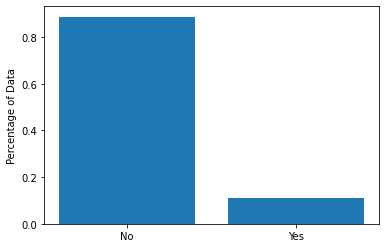

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

As we can see from the bar chart above, this dataset is imbalanced. So I will use the SMOTE method in part 1 to resample the dataset. 

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [15]:
from imblearn.over_sampling import SMOTE
SMOTEsample=SMOTE()
smote_X,smote_y=SMOTEsample.fit_resample(X_scaled,y_train)
X_scaled=smote_X
y_train=smote_y

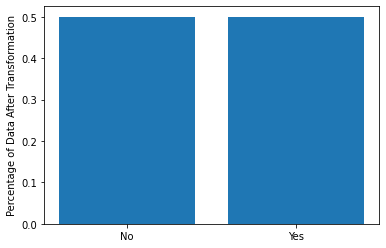

In [50]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data After Transformation")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.169\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.495\ngini = 0.297\nsamples = 19915\nvalue = [16302, 3613]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.116\nsamples = 10514\nvalue = [9867, 647]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.099\nsamples = 10317\nvalue = [9776, 541]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 197\nvalue = [91, 106]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.432\nsamples = 9401\nvalue = [6435, 2966]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 6836\nvalue = [3971, 2865]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.076\nsamples = 2565\nvalue = [2464, 101]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.418\nsamples = 31245\nvalue = [9278, 21967]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.685\ngini = 0.337\nsamples = 25707\nvalue = [5519, 20188]\nclass

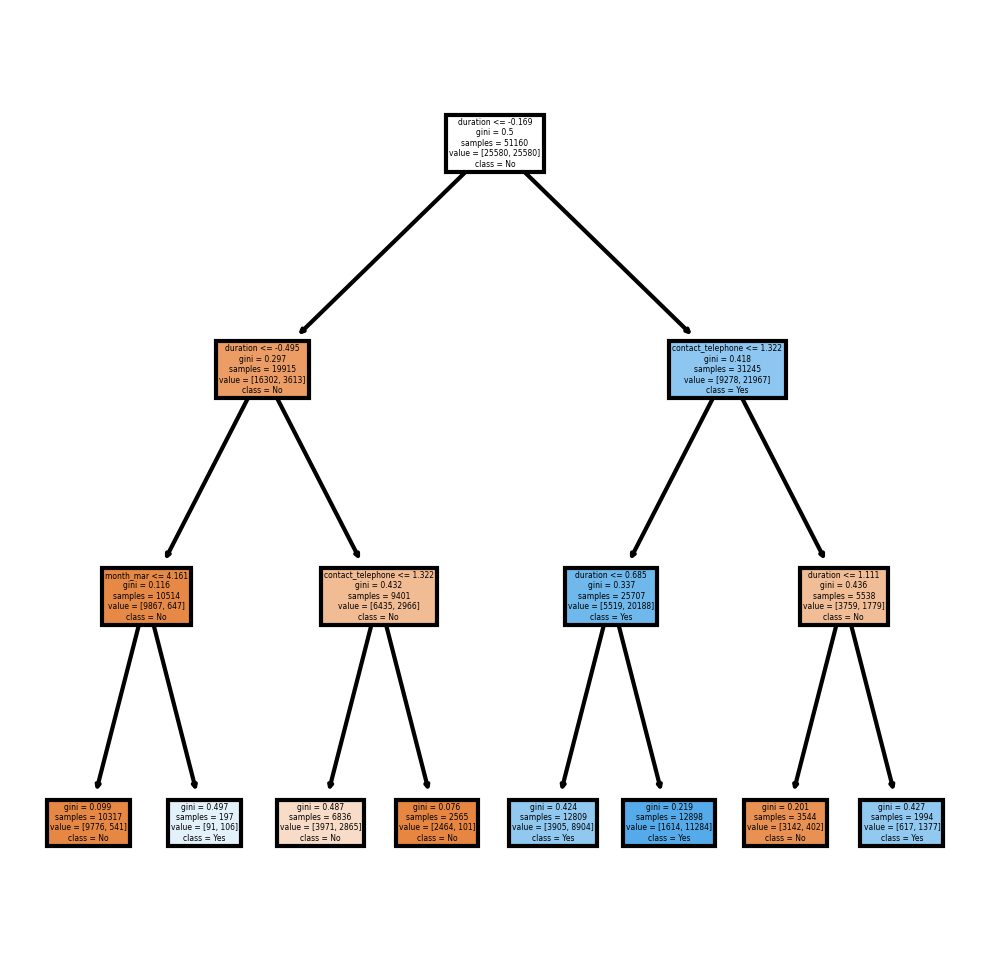

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [18]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

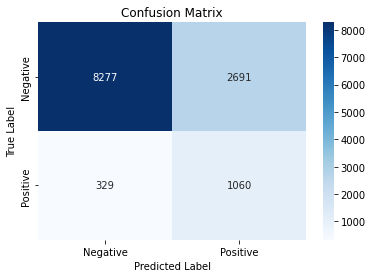

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [20]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7578700331795744


In [21]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

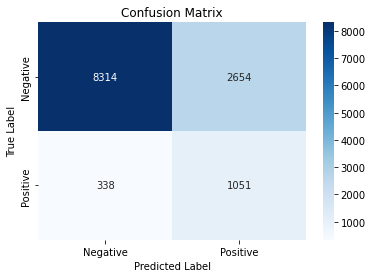

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

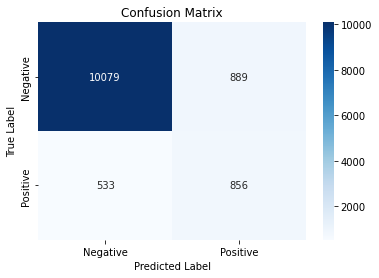

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [27]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 9.0 MB/s eta 0:00:00


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [34]:
### SET YOUR BASE LEARNERS
base_estimators=[
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(n_neighbors=5)

]
super_learner=SuperLearner()
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled,y_train)
### GET base_predictions
base_predictions=super_learner.predict(X_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

In [ ]:
### TRAIN YOUR METALEARNER

In [37]:
log_reg=LogisticRegression(fit_intercept=False).fit(base_predictions,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### INTERPRET COEFFICIENTS

In [39]:
log_reg.coef_

array([[ 9.72766723, -4.632915  , -4.27694049,  9.72766723, -2.84426564]])

As we can see from the coefficient above, the coefficient for the first and the fourth model(logistic regression and support vector classifier model) is very big(around 9), which indicates that if these two models' predictions equal 1, the final prediction is likely to eqaul 1. 

And the coefficient before the second and third model (random forest and decision tree)  is negatively large(around -4), which indicates that if these two models' predictions equal 1, the final prediction is likely to equal 0. 

In [40]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_pred = log_reg.predict(super_learner.predict(X_test))
y_true = y_test
cm_stack = confusion_matrix(y_true, y_pred)

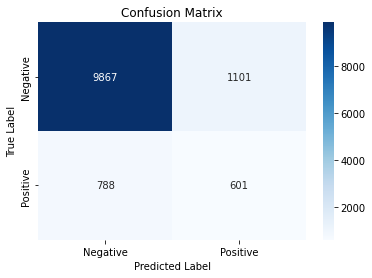

In [41]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [43]:
TP = cm_raw[1, 1]
TN = cm_raw[0, 0]
FP = cm_raw[0, 1]
FN = cm_raw[1, 0]

sensitivity_raw = TP / (TP + FN)
specificity_raw = TN / (TN + FP)

In [44]:
TP = cm_bag[1, 1]
TN = cm_bag[0, 0]
FP = cm_bag[0, 1]
FN = cm_bag[1, 0]

sensitivity_bag = TP / (TP + FN)
specificity_bag = TN / (TN + FP)

In [45]:
TP = cm_boost[1, 1]
TN = cm_boost[0, 0]
FP = cm_boost[0, 1]
FN = cm_boost[1, 0]

sensitivity_boost = TP / (TP + FN)
specificity_boost = TN / (TN + FP)

In [46]:
TP = cm_stack[1, 1]
TN = cm_stack[0, 0]
FP = cm_stack[0, 1]
FN = cm_stack[1, 0]

sensitivity_stack = TP / (TP + FN)
specificity_stack = TN / (TN + FP)

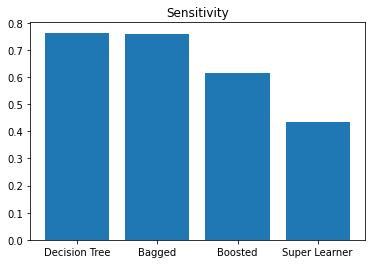

In [48]:
import matplotlib.pyplot as plt


# create bar chart
x = ['Decision Tree', 'Bagged','Boosted','Super Learner']
y = [sensitivity_raw,sensitivity_bag,sensitivity_boost,sensitivity_stack]
plt.bar(x, y)
plt.title('Sensitivity')
plt.show()


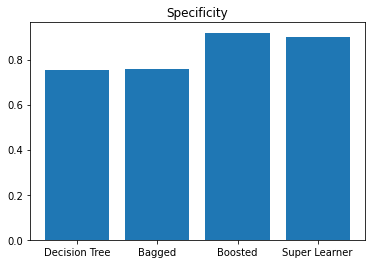

In [49]:
x = ['Decision Tree', 'Bagged','Boosted','Super Learner']
y = [specificity_raw,specificity_bag,specificity_boost,specificity_stack]
plt.bar(x, y)
plt.title('Specificity')
plt.show()